# Sales Data Analysis

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
#df = 

files=[file for file in os.listdir('./Sales_Data/')]

all_month_sale=pd.DataFrame()
for file in files: 
    df=pd.read_csv('./Sales_Data/'+file)
    all_month_sale=pd.concat([all_month_sale,df])
all_month_sale.to_csv('all_months_sale.csv', index=False)

In [53]:
df=pd.read_csv('all_months_sale.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [54]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [55]:
df.shape

(186850, 6)

In [56]:
(df.isnull().sum()/len(df))*100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [57]:
df.dropna(inplace=True)

In [58]:
(df.isnull().sum()/len(df))*100

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# Data Cleaning

## Finding Unique Values

In [60]:
#changing data type

print(df['Quantity Ordered'].unique())
# print(df['Price Each'].unique())
# print(df['Order Date'].unique())


['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']


## Droping Some Values

In [61]:
df = df.drop(df[df['Quantity Ordered']=="Quantity Ordered"].index)
print(df['Quantity Ordered'].unique())

['2' '1' '3' '5' '4' '7' '6' '8' '9']


## Changing Data Types of Columns

In [62]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')


In [63]:
df['Price Each']=df['Price Each'].astype('float32')

In [64]:
# convert column to datetime pandas
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [65]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df['day']= pd.DatetimeIndex(df['Order Date']).day

In [66]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30


## Getting city name from Address

In [102]:
df['city']=df['Purchase Address'].apply(lambda x:x.split(',')[1])

In [97]:
df.tail(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,year,month,day,sales,City
186799,259310,Apple Airpods Headphones,1,150.000000,2019-09-15 19:08:00,"309 Elm St, Los Angeles, CA 90001",2019,9,15,150.000000,Los Angeles
186800,259311,Flatscreen TV,1,300.000000,2019-09-18 14:54:00,"930 North St, Seattle, WA 98101",2019,9,18,300.000000,Seattle
186801,259312,Wired Headphones,1,11.990000,2019-09-02 19:51:00,"573 Sunset St, San Francisco, CA 94016",2019,9,2,11.990000,San Francisco
186802,259313,Bose SoundSport Headphones,1,99.989998,2019-09-05 11:34:00,"138 2nd St, Los Angeles, CA 90001",2019,9,5,99.989998,Los Angeles
186803,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",2019,9,16,11.990000,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",2019,9,16,5.980000,Atlanta
186805,259315,Lightning Charging Cable,1,14.950000,2019-09-29 16:20:00,"112 5th St, Boston, MA 02215",2019,9,29,14.950000,Boston
186806,259316,AAA Batteries (4-pack),1,2.990000,2019-09-16 16:48:00,"369 Johnson St, Atlanta, GA 30301",2019,9,16,2.990000,Atlanta
186807,259317,Lightning Charging Cable,1,14.950000,2019-09-26 21:12:00,"151 1st St, New York City, NY 10001",2019,9,26,14.950000,New York City
186808,259318,AAA Batteries (4-pack),1,2.990000,2019-09-30 10:05:00,"524 Hickory St, Boston, MA 02215",2019,9,30,2.990000,Boston


## Calulating Sales and Adding in Data Frame

In [99]:
df['sales']=df['Quantity Ordered']*df['Price Each']

###### what is best sale month? and revenue of that month?

In [126]:
sale_per_month=df.groupby('month').sum()
sale_per_month

,Quantity Ordered,Price Each,year,day,sales
month,,,,,
1,10903,1811768.375,19602505,155814,1.822257e+06
2,13449,2188884.750,24177525,174408,2.202022e+06
3,17005,2791207.750,30593907,241774,2.807100e+06
4,20558,3367671.000,36905301,282960,3.390670e+06
5,18667,3135125.000,33446754,264875,3.152607e+06
6,15253,2562025.500,27365526,209880,2.577802e+06
7,16072,2632539.500,28857567,227910,2.647776e+06
8,13448,2230345.500,24149259,192315,2.244468e+06
9,13109,2084992.125,23462799,180101,2.097560e+06


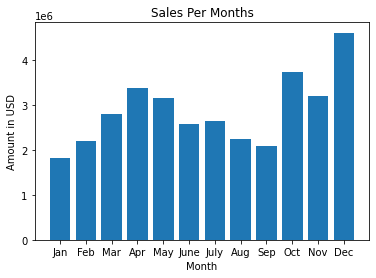

In [101]:
month=['Jan', 'Feb','Mar','Apr', 'May', 'June', 'July', "Aug", "Sep", 'Oct', 'Nov', 'Dec']
plt.bar(month,sale_per_month['sales'])
plt.title('Sales Per Months')
plt.xlabel("Month")
plt.ylabel('Amount in USD')
plt.show()

####  Q; which city sold most products?

In [125]:
sale_per_city=df.groupby('city').sum()
sale_per_city

,Quantity Ordered,Price Each,year,month,day,sales
city,,,,,,
Atlanta,16602,2779908.250,30044739,104794,234837,2.795499e+06
Austin,11153,1809873.625,19998197,69829,156782,1.819582e+06
Boston,22528,3637409.750,40246750,141112,312376,3.661642e+06
Dallas,16730,2752627.750,29921582,104620,234435,2.767975e+06
Los Angeles,33289,5421435.000,59772496,208325,469607,5.452571e+06
New York City,27932,4635371.000,50224654,175741,392706,4.664317e+06
Portland,14053,2307747.500,25166837,87765,197521,2.320491e+06
San Francisco,50239,8211461.500,90313920,315520,702669,8.262204e+06
Seattle,16553,2733296.000,29743909,104941,229552,2.747755e+06


In [128]:
city=[city for city , df in df.groupby('city')]



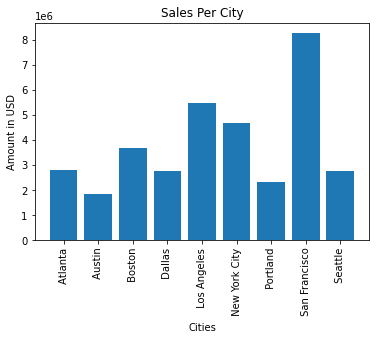

In [129]:
#plt.figure(figsize=(12, 7))
plt.bar(city,sale_per_city['sales'])
plt.title('Sales Per City')
plt.xlabel("Cities")
plt.ylabel('Amount in USD')

plt.xticks(city, rotation='vertical')
plt.show()

In [130]:
df['hour']=df['Order Date'].dt.hour
df['minutes']=df['Order Date'].dt.minute

In [135]:
hours=[hour for hour , df in df.groupby('hour')]

In [142]:
c=df.groupby('hour').count()


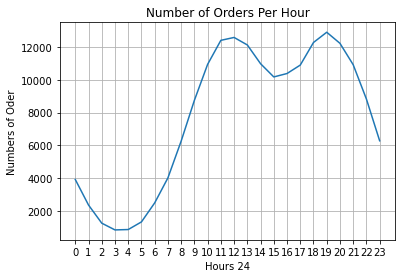

In [146]:
plt.plot(hours,c['Quantity Ordered'])
plt.xticks(hours)
plt.title('Number of Orders Per Hour')
plt.xlabel('Hours 24')
plt.ylabel('Numbers of Oder')
plt.grid()
plt.show()

our peak time is 11 am and 7 pm

In [162]:
df1 = df[df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df1['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df1[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\A\AppData\Local\Temp\ipykernel_9036\3371231439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [163]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


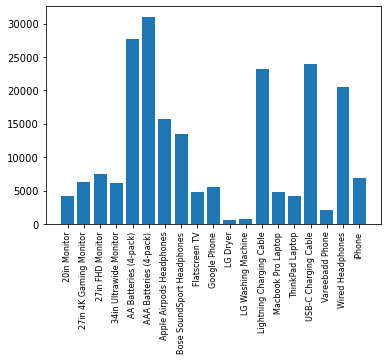

In [165]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_9036\377229585.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\A\AppData\Local\Temp\ipykernel_9036\377229585.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


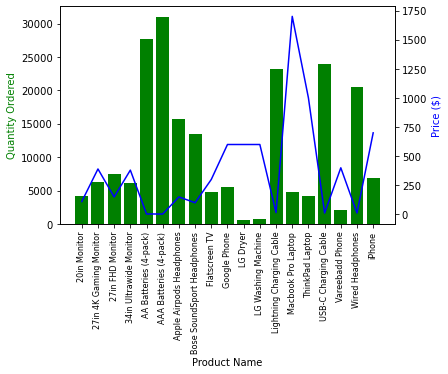

In [167]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()